Model Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.51      0.52      2022
           1       0.49      0.50      0.49      1875
           2       0.94      0.95      0.95     24021
           3       0.92      0.92      0.92     16082

    accuracy                           0.90     44000
   macro avg       0.72      0.72      0.72     44000
weighted avg       0.90      0.90      0.90     44000



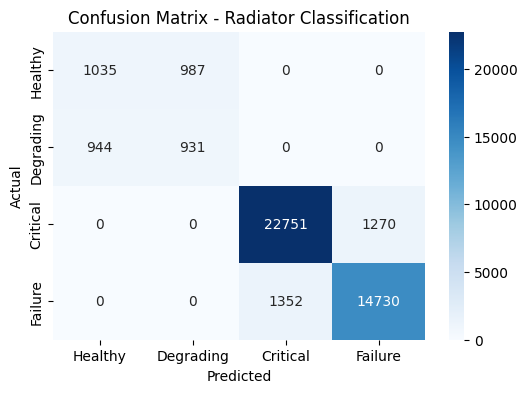

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

file_path = "radiator_final_faults.csv"
df = pd.read_csv(file_path)

X = df.drop(columns=["RadiatorPerformance"])
y = pd.cut(df["RadiatorPerformance"], bins=[0, 40, 70, 100], labels=[0, 1, 2])  

def classify_health(performance):
    if performance >= 80:
        return "Healthy"
    elif 50 <= performance < 80:
        return "Degrading"
    elif 20 <= performance < 50:
        return "Critical"
    else:
        return "Failure"

df["HealthStatus"] = df["RadiatorPerformance"].apply(classify_health)

health_mapping = {"Healthy": 3, "Degrading": 2, "Critical": 1, "Failure": 0}
df["HealthStatus"] = df["HealthStatus"].map(health_mapping)

X = df.drop(columns=["RadiatorPerformance", "HealthStatus"]) 
y = df["HealthStatus"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=health_mapping.keys(), yticklabels=health_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Radiator Classification")
plt.show()